**RETAIL SALES FORECASTING USING MACHINE LEARNING**
by Angela van der Westhuizen

Retail companies are constantly faced with decision making in order to boost sales.
Managers are sometimes expected to forecast sales in order to prepare for demand trends, sales
forecasting is the process of estimating future sales of products or services based on historical data,
market trends, customer behavior, and other factors. Accurate retail sales forecasting can therefore
help retailers with inventory optimization, marketing, pricing, and staffing decisions. This is a Big Mart Dataset with historical Data from 2013 covering 10 different stores with thousands of products, Big Mart wants to maximise their sales and this requires information and analytics to help predict future sales and determine what increase sales and what variables have no effect on sales. However,retail
sales forecasting is challenging due to the complexity and uncertainty of the factors that affect sales, therefore, this project presents an analysis of the Bigmart Sales dataset, aiming to predict the sales of items for the 10 outlets. The dataset is divided into training and testing sets, and the project involves data exploration, cleaning, visualization, and predictive modeling.

**Data Source**
The dataset for this project was sourced from one of the readily available datasets from Kaggle.com.
The data set contains Big Mart sales data for 2013 covering 10 stores with variables such as Item Type, outlet type, outlet size, maximum retail price etc.

1. **Importing Relevant Libraries**
The necessary libraries, such as pandas, numpy, seaborn, and scikit-learn, are imported to facilitate data manipulation, visualization, and machine learning model development.

In [375]:
from sklearn.preprocessing import OneHotEncoder

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge


2. **Loading Datasets**
The training and testing datasets are loaded into pandas dataframes their shapes are checked to understand the number of records and features in each dataset.

In [377]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [378]:
# checking the shape of train
train.shape

(8523, 12)

In [379]:
# checking the shape of test
test.shape

(5681, 11)

In [380]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


**Data exploration and preprocessing**: This step involves exploring the data set, checking for
missing values, outliers, and anomalies, and performing appropriate transformations and feature
engineering.
3.1 Dataset Overview
The first 5 rows of the training dataset are displayed, and the data types and information about missing values are examined. The describe() and info() functions give summaries about the dataset.

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [382]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 Data Cleaning
Several steps are taken to clean the data,  including checking for and handling missing values through replacement and imputation.

In [383]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight has 1463 and Outlet_Size has 2410 missing values

In [384]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


DATA VISUALISATION
Creating visuals using Scatter plots, bar charts, boxplots etc. to depict relationships between varibles aswell as show patterns.

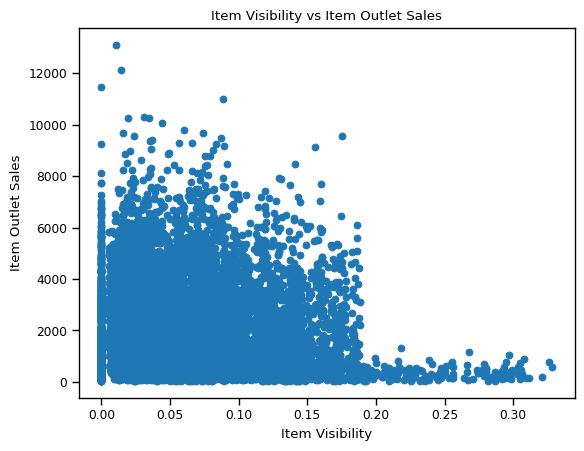

In [385]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales)
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility vs Item Outlet Sales")

plt.show()

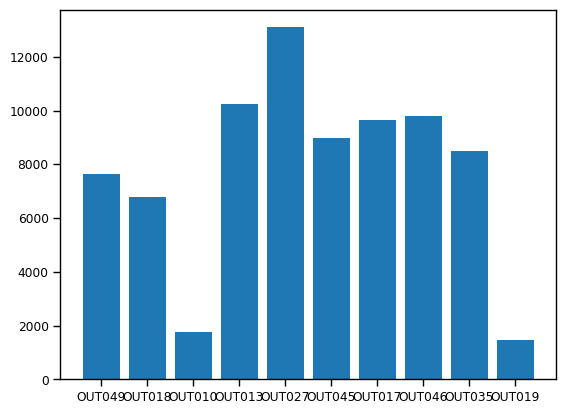

In [386]:
plt.bar(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.show()

<ipython-input-387-6d756122d59c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=train ,palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,
<ipython-input-387-6d756122d59c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=train ,palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,
<ipython-input-387-6d756122d59c>:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'gray'}` instead.

  sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=train ,palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,
<ipython-input-387-6d756122d59c>:1

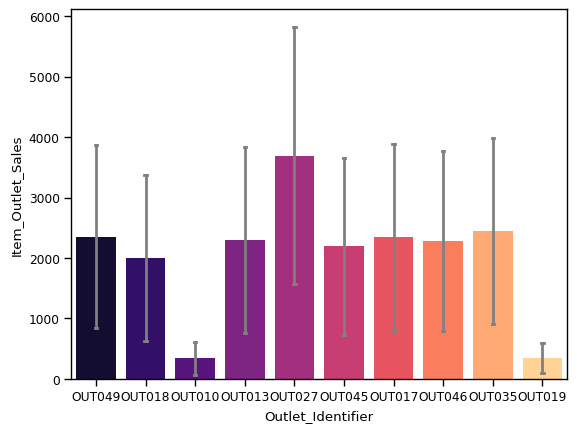

In [387]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=train ,palette='magma',capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,
            ci = 'sd')
plt.show()

    .Top 2 Contributors: Outlet_27 > Outlet_35
    .Bottom 2 Contributors: Outlet 10 & Outlet 19

Analysing sales by Item type

<ipython-input-388-fa62b5c5663c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='hls',saturation=8)


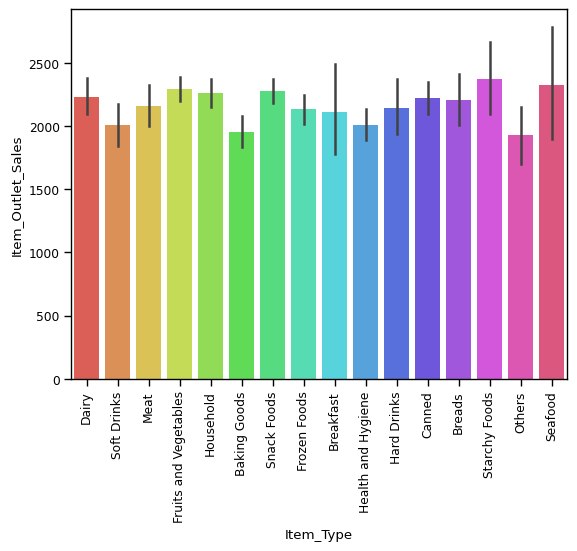

In [388]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

#### Using a boxplot to check for outliers for each item type

<ipython-input-389-c059c25a9ddf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Type',y='Item_MRP',data=train,palette='Paired',saturation=8)


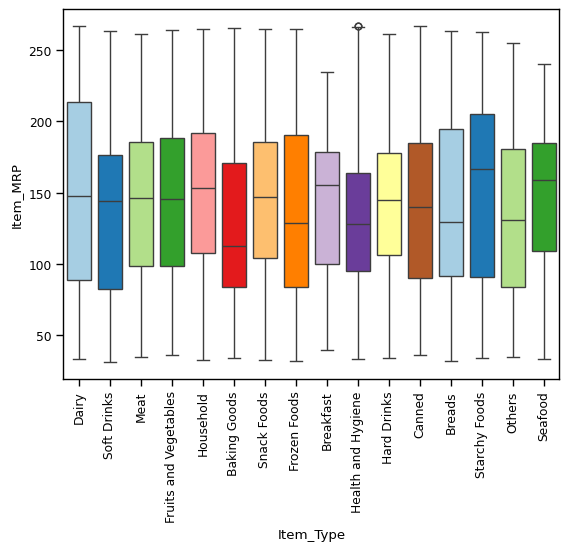

In [389]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=train,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

In [390]:
train.Item_Fat_Content.value_counts() # has mismatched factor levels

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [391]:
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [392]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [393]:
test['Item_Outlet_Sales'] = 1
test.Item_Outlet_Sales.head()

0    1
1    1
2    1
3    1
4    1
Name: Item_Outlet_Sales, dtype: int64

In [394]:
train_copy = train.copy()
test_copy = test.copy()

In [395]:
combined = pd.concat([train,test])
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [396]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [397]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Grocery stores are mapped to "small" since most of the fall under that category

In [398]:
dic = {'Grocery Store':'Small'}
s = train.Outlet_Type.map(dic)

In [399]:
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [400]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [401]:
#checking for location type
crosstable = pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [402]:
dic = {"Tier 2":"Small"}
s = train.Outlet_Location_Type.map(dic)
train.Outlet_Size = train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [403]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [404]:
train.Item_Identifier.value_counts().sum()

8523

In [405]:
#Fill missing values of weight of Item According to means of Item Identifier
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [406]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [407]:
# List of item types
item_type_list = train.Item_Type.unique().tolist()
item_type_list

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [408]:
# grouping based on item type and calculating mean of item weight
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean()

In [409]:
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [410]:
# Mapiing Item weight to item type mean
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = train.Item_Type.map(dic)
    train.Item_Weight = train.Item_Weight.combine_first(s)

Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean()

train.isnull().sum()



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [411]:
Item_Type_Means

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

**Missing values for item_weight have been imputed**

In [412]:
train.Item_Weight.isnull().any() # no missing values

False

### Imputing for item visibility

Item visibility cannot be 0 and should be treated as missing values and imputed

In [413]:
train.Item_Visibility.value_counts().head() # There are 526 values with 0 Item visibility

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

**Imputing with mean of item_visibility of particular item identifier category as some items may be more visible and some less.

In [414]:
# Replacing 0's with NaN
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


In [415]:
train.Item_Visibility.value_counts().head()

0.121880    4
0.027777    3
0.029511    3
0.081428    3
0.016164    3
Name: Item_Visibility, dtype: int64

In [416]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Standardising and renaming fat content levels to make it uniform for each level. eg lf and low fat will both be low fat

In [417]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [418]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [419]:
train['Outlet_Year'] = (2013 - train.Outlet_Establishment_Year)

In [420]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


### Encoding Categorical Variables

In [421]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [422]:
#Convert categorical into numerical
var_cat = var_cat.columns.tolist()
var_cat = ['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

var_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [423]:
train['Item_Type_New'] = train.Item_Identifier
train.Item_Type_New.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Type_New, dtype: object

In [424]:
train.Item_Type_New.replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [425]:
le = LabelEncoder()

In [426]:
train['Outlet'] = le.fit_transform(train.Outlet_Identifier)
train['Item'] = le.fit_transform(train.Item_Type_New)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,9,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,9,1
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,0,1
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,1,2


In [427]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,14,Food,9,1
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,4,Drinks,3,0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,14,Food,9,1
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,2,2,0,732.3800,15,Food,0,1
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,0,2,1,994.7052,26,Non-Consumable,1,2


In [428]:
#Visualizing Correlation
corrmat = train.corr()
corrmat

<ipython-input-428-30167102f0e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet,Item
Item_Weight,1.000000,-0.026797,-0.021226,0.035710,0.025967,-0.013417,-0.012445,0.002973,0.000592,0.013198,0.013417,-0.007586,0.071585
Item_Fat_Content,-0.026797,1.000000,0.052620,-0.139434,0.006063,0.003151,-0.001262,-0.001598,0.002199,0.018719,-0.003151,0.000764,-0.166111
Item_Visibility,-0.021226,0.052620,1.000000,-0.042400,-0.005951,-0.075238,0.090322,-0.030449,-0.170752,-0.126026,0.075238,-0.096282,-0.050520
Item_Type,0.035710,-0.139434,-0.042400,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048,-0.004970,0.001656,0.007456
Item_MRP,0.025967,0.006063,-0.005951,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574,-0.005020,0.003319,0.032517
Outlet_Establishment_Year,-0.013417,0.003151,-0.075238,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135,-1.000000,0.079035,-0.008551
Outlet_Size,-0.012445,-0.001262,0.090322,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753,-0.425534,0.260272,-0.001276
Outlet_Location_Type,0.002973,-0.001598,-0.030449,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367,0.089216,-0.716176,0.007661
Outlet_Type,0.000592,0.002199,-0.170752,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522,0.122304,0.099873,0.001136
Item_Outlet_Sales,0.013198,0.018719,-0.126026,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,0.049135,0.162325,0.011236


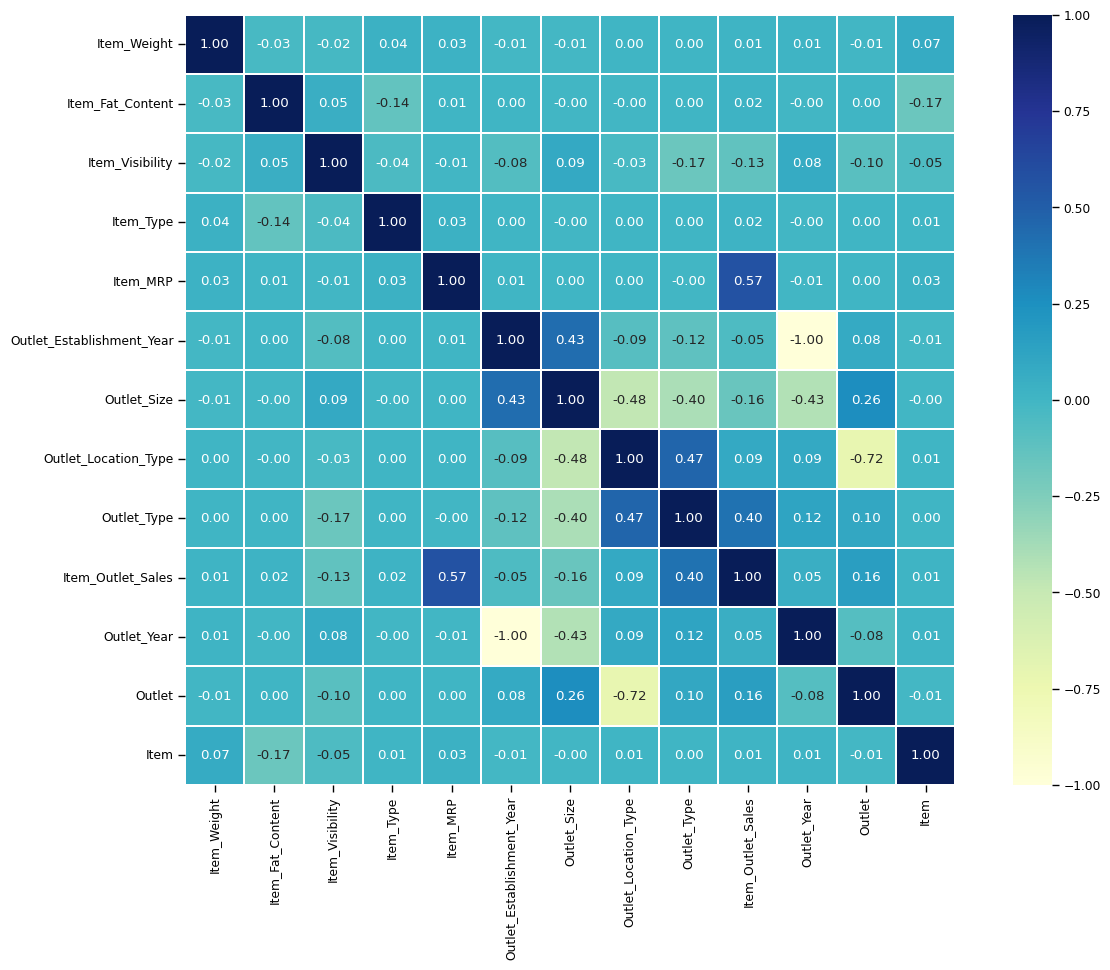

In [429]:
f,ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat,annot=True,ax=ax,cmap="YlGnBu",linewidths=0.1,fmt=".2f",square=True)
plt.show()

# Predictive Modelling

In [430]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year',
            'Outlet','Item','Item_Weight']

In [431]:
seed = 240
np.random.seed(seed)

In [432]:
X = train[predictors]
y = train.Item_Outlet_Sales

In [433]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,14,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,4,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,14,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,15,0,1,19.20
4,0,0.016164,9,53.8614,0,2,1,26,1,2,8.93


In [434]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [435]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [436]:
X_train.shape

(6392, 11)

In [437]:
X_train.tail()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
5734,1,0.286345,6,139.1838,2,2,0,15,0,1,9.395
5191,0,0.117575,5,75.6670,2,1,1,6,2,1,15.600
5390,0,0.018944,8,237.3590,2,1,1,11,7,2,17.600
860,0,0.054363,13,117.9466,2,1,1,6,2,1,20.350
7270,0,0.016993,9,95.7410,2,0,1,16,8,2,16.350


In [438]:
X_test.shape

(2131, 11)

In [439]:
y_train.tail()

5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, dtype: float64

In [440]:
y_test.tail()

4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, dtype: float64

In [441]:
y_train.shape

(6392,)

In [442]:
y_test.shape

(2131,)

In [443]:
lm = LinearRegression()

In [444]:
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [445]:
predictions[:5]

array([1008.45407221,  694.2737362 , 1001.31600703, 4258.41831096,
       3063.11801929])

## Plotting the model

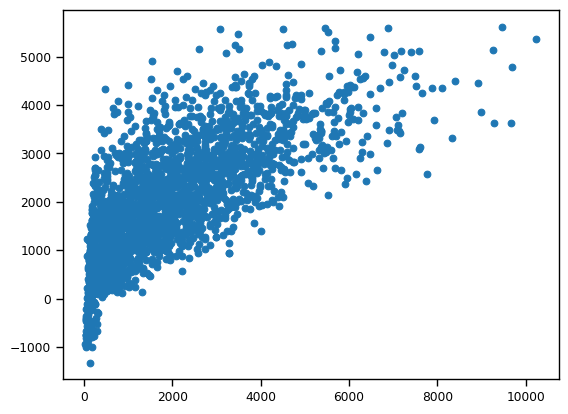

In [446]:
plt.scatter(y_test,predictions)
plt.show()

In [447]:
#Accuracy Score
print("Linear Regression Model Score:",model.score(X_test,y_test))

Linear Regression Model Score: 0.5052133696581127


In [448]:
original_values = y_test

In [449]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))

In [450]:
print("Linear Regression R2 score: ",metrics.r2_score(original_values,predictions))

Linear Regression R2 score:  0.5052133696581127


In [451]:
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1168.3771118194904


**Linear Regression wihtout cross validation:**

    Linear Regression R2 score:  0.505
    Linear Regression RMSE:  1168.37

    

In [452]:
# Linear Regression with statsmodels
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     584.9
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:13:33   Log-Likelihood:                -54463.
No. Observations:                6392   AIC:                         1.090e+05
Df Residuals:                    6380   BIC:                         1.090e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -841.4599    129.806     -6.482      0.000   -1095.923    -586.996
Item_Fat_Content        81.1896     32.592      2.491      0.013      17.299     145.081
Item_Visibility      -1581.9458    314.339     -5.033      0.000   -2198.156    -965.735
Item_Type                0.1367      3.663      0.037      0.970      -7.044       7.317
Item_MRP                15.6333      0.243     64.333      0.000      15.157      16.110
Outlet_Size           -151.9287     29.168     -5.209      0.000    -209.107     -94.750
Outlet_Location_Type   -96.7356     43.708     -2.213      0.027    -182.418     -11.053
Outlet_Type            819.6678     31.057     26.392      0.000     758.785     880.550
Outlet_Year             -0.2265      2.053     -0.110      0.912      -4.251       3.798
Outlet                  59.5489     10.906      5.460      0.000      38.169      80.929
Item                     5.5255     29.549      0.187      0.852     -52.400      63.451
Item_Weight             -2.5387      3.292     -0.771      0.441      -8.993       3.915
==============================================================================
Omnibus:                      589.676   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.869
Skew:                           0.608   Prob(JB):                    8.44e-258
Kurtosis:                       4.722   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [453]:
predictions = results.predict(x)
predictions.head()

4776    4563.612802
7510    3386.056074
5828    2623.734246
5327    1182.020927
4810    1812.940626
dtype: float64

In [454]:
predictionsDF = pd.DataFrame({"Predictions":predictions})
joined = x.join(predictionsDF)
joined.head()

,const,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight,Predictions
4776,1.0,0,0.029565,9,256.4646,1,2,2,4,3,2,16.350,4563.612802
7510,1.0,1,0.065917,13,179.7660,1,2,2,4,3,1,15.250,3386.056074
5828,1.0,1,0.158716,10,157.2946,1,0,1,14,9,1,12.350,2623.734246
5327,1.0,0,0.014628,0,82.3250,2,1,1,9,6,1,7.975,1182.020927
4810,1.0,0,0.016645,5,120.9098,2,1,1,11,7,1,19.350,1812.940626


### Performing Croass Validation

In [455]:
# Perform 6-fold cross validat
score = cross_val_score(model,X,y,cv=5)
print("Linear Regression Cross Validated Score: ",score)

Linear Regression Cross Validated Score:  [0.51828865 0.5023478  0.48262104 0.50311721 0.4998021 ]


In [456]:
#Predicting with cross_val_predict
predictions = cross_val_predict(model,X,y,cv=6)
predictions[:5]

array([4176.33789161, 1411.34617329, 2489.52441577, 1484.81451779,
        620.00074558])

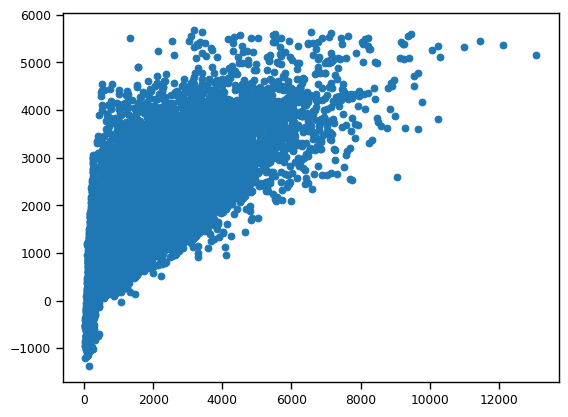

In [457]:
plt.scatter(y,predictions)
plt.show()

### Using KFold Validation

In [458]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [459]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [461]:
kf = KFold(n_splits=10,random_state=(None))
kf.get_n_splits(X)

10

In [462]:
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [463]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index,val_index in kf.split(X_train,y_train):
        X_train,X_val = X.iloc[train_index],X.iloc[val_index]
        y_train,y_val = y.iloc[train_index],y.iloc[val_index]

        # Instantiate Model
        lasso_model = Lasso(alpha=alpha,fit_intercept=True,random_state=77)

        #Caculate Errors
        train_error,val_error = calc_metrics(X_train,y_train,X_val,y_val,lasso_model)

        # append to list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    # generate report

    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error): 1422039.8273 | mean(val_error): 1428622.8128
alpha:  0.001 | mean(train_error): 1429417.1653 | mean(val_error): 1436695.3433
alpha:   0.01 | mean(train_error): 1421688.9473 | mean(val_error): 1430946.0224
alpha:    0.1 | mean(train_error): 1422763.8003 | mean(val_error): 1432629.1168
alpha:      1 | mean(train_error): 1432112.8966 | mean(val_error): 1440583.5172
alpha:   10.0 | mean(train_error): 1448763.2857 | mean(val_error): 1456152.8539


### Random Forest Regressor

In [464]:
rf = RandomForestRegressor(random_state=43)

In [465]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=43)

In [466]:
predictions = rf.predict(X_test)
predictions[:5]

array([ 728.41849 ,  476.233424,  638.155984, 5282.277434, 2499.692836])

In [467]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
rmse

882.3287756237341

In [468]:
print(metrics.r2_score(y_test,predictions))

0.7178287506264407


In [469]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,728.418490
2957,356.8688,476.233424
7031,377.5086,638.155984
1084,5778.4782,5282.277434
856,2356.9320,2499.692836


### Randorm Forest Regression with kfold validation score
    RMSE: 882
    R2 Score: 0.717
    

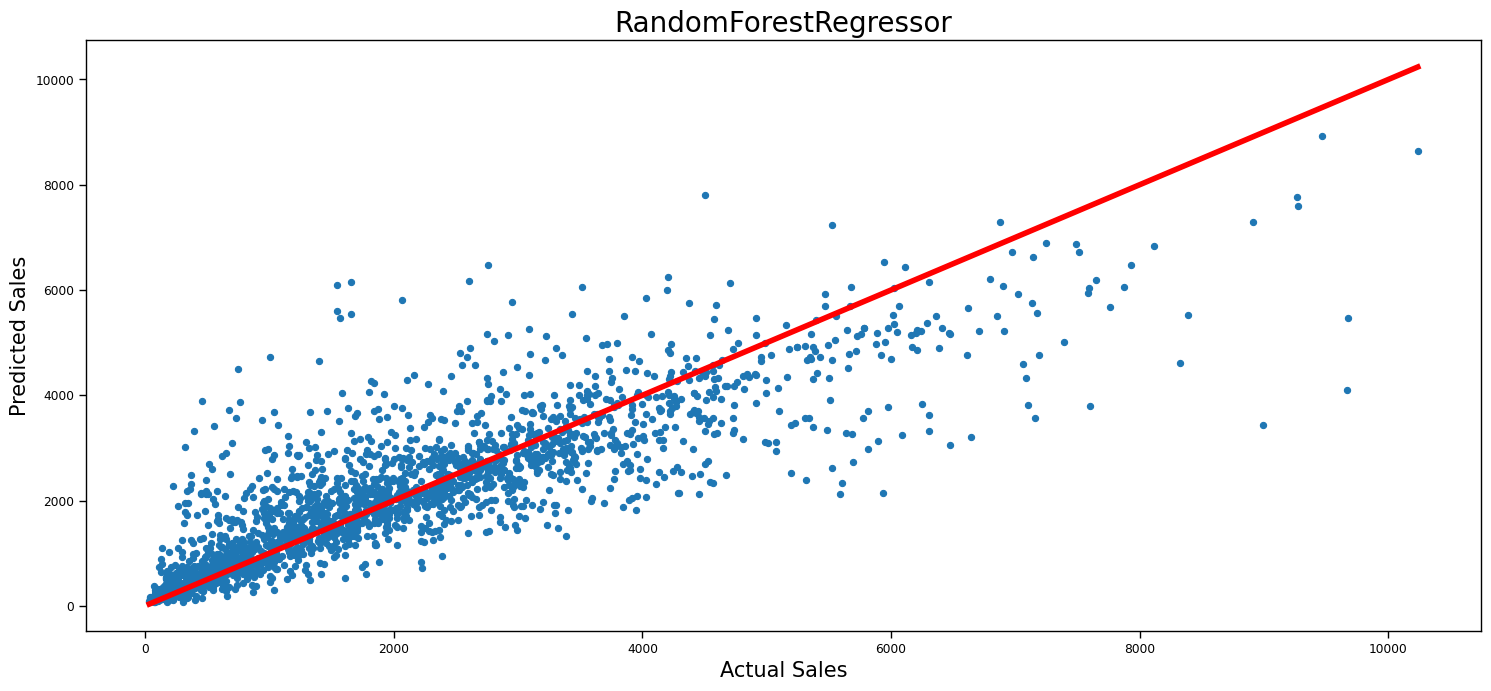

In [471]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, predictions, s=20)
plt.title('RandomForestRegressor',fontsize=20)
plt.xlabel('Actual Sales',fontsize=15)
plt.ylabel('Predicted Sales',fontsize=15)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth = 4)
plt.tight_layout()

# References

[Model Tuning Reference](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)

[Towards Data Science](http://towardsdatascience.com/)

[Sklearn Documentation](https://scikit-learn.org/stable/)

[Stackoverflow](https://stackoverflow.com/)

